In [ ]:
!pip install -q findspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyarrow

In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/Customeranalysis/part-00000-bc34bbb5-8bd9-48b4-b7b8-7dabcfd43015-c000.snappy.parquet')
df.head()


,external_code,date,customer,qty,long sleeve,culottes,miniskirt,short sleeves,printed shirt,short cardigan,...,sales_after_discount_d_5,sales_after_discount_d_6,sales_after_discount_d_7,sales_after_discount_d_8,sales_after_discount_d_9,sales_after_discount_d_10,sales_after_discount_d_11,sales_after_discount_d_12,total_sales_before_discount,total_sales_after_discount
0,28,2016-12-19,10295,1,65,47,41,43,60,17,...,0.378022,0.378022,0.378022,0.378022,0.567033,0.567033,0.567033,0.567033,20.4,19.279138
1,28,2017-03-06,13597,1,50,52,37,68,72,32,...,0.378022,0.378022,0.378022,0.378022,0.567033,0.567033,0.567033,0.567033,20.4,19.279138
2,28,2016-12-26,63341,1,61,47,54,52,54,47,...,0.378022,0.378022,0.378022,0.378022,0.567033,0.567033,0.567033,0.567033,20.4,19.279138
3,28,2016-12-19,82760,1,65,47,41,43,60,17,...,0.378022,0.378022,0.378022,0.378022,0.567033,0.567033,0.567033,0.567033,20.4,19.279138
4,28,2017-03-13,83054,1,47,56,50,46,67,23,...,0.378022,0.378022,0.378022,0.378022,0.567033,0.567033,0.567033,0.567033,20.4,19.279138


In [ ]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName('ParquetToPandas').getOrCreate()

# Define the path to your Parquet file
parquet_file_path = '/content/drive/MyDrive/Customeranalysis'

# Read the Parquet file using PySpark
df_spark = spark.read.parquet(parquet_file_path)

# Limit the number of rows to 5000
df_spark_limited = df_spark.limit(10000)

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df_spark_limited.toPandas()

# Show the first few rows of the Pandas DataFrame
print(df_pandas.head())


   external_code        date  customer  qty  long sleeve  culottes  miniskirt  \
0              4  2017-07-17      1518    1           44        78        100   
1              4  2017-07-17      1518    1           44        78        100   
2              4  2017-07-17      1518    1           44        78        100   
3              4  2017-07-17      1518    1           44        78        100   
4              4  2017-07-17      1518    1           44        78        100   

   short sleeves  printed shirt  short cardigan  ...  \
0             77             68              55  ...   
1             77             68              55  ...   
2             77             68              55  ...   
3             77             68              55  ...   
4             77             68              55  ...   

   sales_after_discount_d_5  sales_after_discount_d_6  \
0                  0.324566                  0.324566   
1                  0.000000                  0.000000   
2    

In [ ]:
print(df_pandas.columns.tolist())


['external_code', 'date', 'customer', 'qty', 'long sleeve', 'culottes', 'miniskirt', 'short sleeves', 'printed shirt', 'short cardigan', 'solid color top', 'trapeze dress', 'sleeveless', 'long cardigan', 'sheath dress', 'short coat', 'medium coat', 'doll dress', 'long dress', 'shorts', 'long coat', 'jumpsuit', 'drop sleeve', 'patterned top', 'kimono dress', 'medium cardigan', 'shirt dress', 'maxi', 'capris', 'gitana skirt', 'long duster', 'yellow', 'brown', 'blue', 'grey', 'green', 'black', 'red', 'white', 'orange', 'violet', 'acrylic', 'scuba crepe', 'tulle', 'angora', 'faux leather', 'georgette', 'lurex', 'nice', 'crepe', 'satin cotton', 'silky satin', 'fur', 'matte jersey', 'plisse', 'velvet', 'lace', 'cotton', 'piquet', 'plush', 'bengaline', 'jacquard', 'frise', 'technical', 'cady', 'dark jeans', 'light jeans', 'ity', 'plumetis', 'polyviscous', 'dainetto', 'webbing', 'foam rubber', 'chanel', 'marocain', 'macrame', 'embossed', 'heavy jeans', 'nylon', 'tencel', 'paillettes', 'chambre

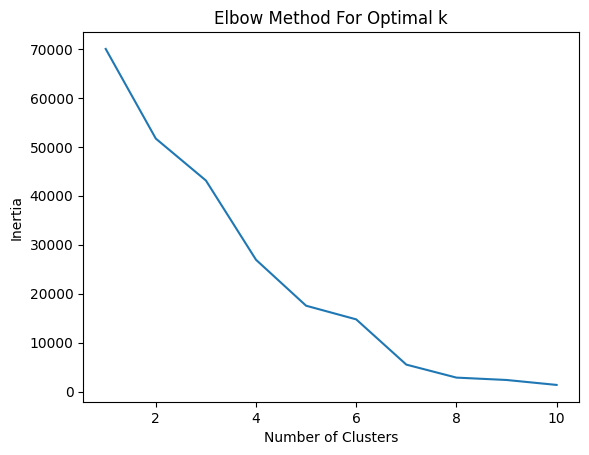

   qty     price  total_sales_after_discount  cluster
0    1  0.016468                    8.851789        2
1    1  0.054944                   45.362678        0
2    1  0.054944                   12.285725        1
3    1  0.054944                   43.850589        0
4    1  0.054944                   34.022008        0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_pandas is your DataFrame after reading from Parquet

# Preprocessing: Select features for clustering (e.g., sales, quantity, etc.)
# Adjust columns based on your dataset
features = df_pandas[['qty', 'price', 'total_sales_after_discount', 'sales_after_discount_d_1',
                      'sales_after_discount_d_2', 'sales_after_discount_d_3', 'sales_after_discount_d_4']]


features = features.dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, choose the optimal number of clusters (let's say k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pandas['cluster'] = kmeans.fit_predict(features_scaled)

# Show the segments
print(df_pandas[['qty', 'price', 'total_sales_after_discount', 'cluster']].head())

# You can now analyze these clusters for customer segmentation


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare features for clustering (example: number of items purchased in each category)
product_columns = ['long sleeve', 'culottes', 'miniskirt', 'short sleeves', 'printed shirt', 'short cardigan',
                   'solid color top', 'trapeze dress', 'sleeveless', 'long cardigan', 'sheath dress', 'short coat',
                   'medium coat', 'doll dress', 'long dress', 'shorts', 'long coat', 'jumpsuit', 'drop sleeve',
                   'patterned top', 'kimono dress', 'medium cardigan', 'shirt dress', 'maxi', 'capris', 'gitana skirt',
                   'long duster']
fabric_columns = ['acrylic', 'scuba crepe', 'tulle', 'angora', 'faux leather', 'georgette', 'lurex', 'nice', 'crepe',
                  'satin cotton', 'silky satin', 'fur', 'matte jersey', 'plisse', 'velvet', 'lace', 'cotton', 'piquet',
                  'plush', 'bengaline', 'jacquard', 'frise', 'technical', 'cady', 'dark jeans', 'light jeans', 'ity',
                  'plumetis', 'polyviscous', 'dainetto', 'webbing', 'foam rubber', 'chanel', 'marocain', 'macrame',
                  'embossed', 'heavy jeans', 'nylon', 'tencel', 'paillettes', 'chambree', 'chine crepe', 'muslin cotton or silk',
                  'linen', 'tactel', 'viscose twill', 'cloth', 'mohair', 'mutton', 'scottish', 'milano stitch', 'devore', 'hron',
                  'ottoman', 'fluid', 'flamed', 'fluid polyviscous', 'shiny jersey', 'goose']
color_columns = ['yellow', 'brown', 'blue', 'grey', 'green', 'black', 'red', 'white', 'orange', 'violet']

# Concatenate all features (you could select a subset of these features based on business logic)
features = df_pandas[product_columns + fabric_columns + color_columns].values

# Normalize the data to have similar scale for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters as needed
df_pandas['Cluster'] = kmeans.fit_predict(scaled_features)

# View the first few rows with assigned clusters
print(df_pandas[['customer', 'Cluster']].head())



   customer  Cluster
0     10295        0
1     13597        0
2     63341        0
3     82760        0
4     83054        0


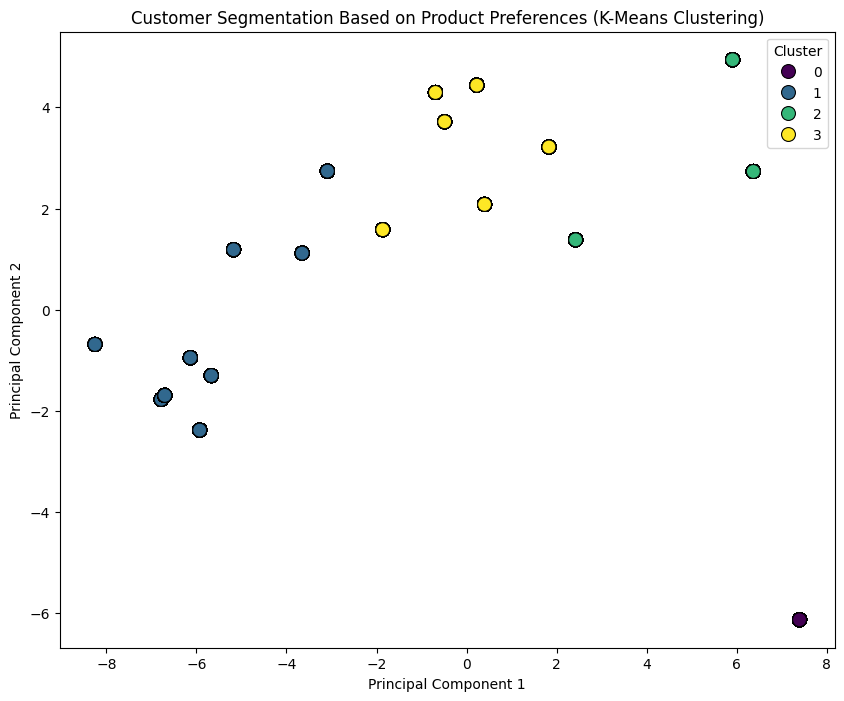

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepared features for clustering (example: number of items purchased in each category)
product_columns = ['long sleeve', 'culottes', 'miniskirt', 'short sleeves', 'printed shirt', 'short cardigan',
                   'solid color top', 'trapeze dress', 'sleeveless', 'long cardigan', 'sheath dress', 'short coat',
                   'medium coat', 'doll dress', 'long dress', 'shorts', 'long coat', 'jumpsuit', 'drop sleeve',
                   'patterned top', 'kimono dress', 'medium cardigan', 'shirt dress', 'maxi', 'capris', 'gitana skirt',
                   'long duster']
fabric_columns = ['acrylic', 'scuba crepe', 'tulle', 'angora', 'faux leather', 'georgette', 'lurex', 'nice', 'crepe',
                  'satin cotton', 'silky satin', 'fur', 'matte jersey', 'plisse', 'velvet', 'lace', 'cotton', 'piquet',
                  'plush', 'bengaline', 'jacquard', 'frise', 'technical', 'cady', 'dark jeans', 'light jeans', 'ity',
                  'plumetis', 'polyviscous', 'dainetto', 'webbing', 'foam rubber', 'chanel', 'marocain', 'macrame',
                  'embossed', 'heavy jeans', 'nylon', 'tencel', 'paillettes', 'chambree', 'chine crepe', 'muslin cotton or silk',
                  'linen', 'tactel', 'viscose twill', 'cloth', 'mohair', 'mutton', 'scottish', 'milano stitch', 'devore', 'hron',
                  'ottoman', 'fluid', 'flamed', 'fluid polyviscous', 'shiny jersey', 'goose']
color_columns = ['yellow', 'brown', 'blue', 'grey', 'green', 'black', 'red', 'white', 'orange', 'violet']

# Concatenate all features (you could select a subset of these features based on business logic)
features = df_pandas[product_columns + fabric_columns + color_columns].values

# Normalize the data to have similar scale for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters as needed
df_pandas['Cluster'] = kmeans.fit_predict(scaled_features)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the dataframe for plotting
df_pandas['PCA1'] = pca_result[:, 0]
df_pandas['PCA2'] = pca_result[:, 1]

# Plot the clusters in 2D using the first two PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pandas, palette='viridis', s=100, edgecolor='black')
plt.title('Customer Segmentation Based on Product Preferences (K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
#Cluster 0: "White & Blue Basics" (Highlights the strong presence of white and blue items)
#Cluster 1: "Yellow & Technical Focus" (Emphasizes the yellow color and the interest in technical fabrics)
#Cluster 2: "Yellow & Fluid Style" (Highlights the yellow color and the preference for fluid items)
#Cluster 3: "White & Blue Inclined" (Similar to Cluster 0, indicating a tendency towards white and blue)

In [ ]:
print(df_pandas.columns)

Index(['external_code', 'date', 'customer', 'qty', 'long sleeve', 'culottes',
       'miniskirt', 'short sleeves', 'printed shirt', 'short cardigan',
       ...
       'sales_after_discount_d_6', 'sales_after_discount_d_7',
       'sales_after_discount_d_8', 'sales_after_discount_d_9',
       'sales_after_discount_d_10', 'sales_after_discount_d_11',
       'sales_after_discount_d_12', 'total_sales_before_discount',
       'total_sales_after_discount', 'cluster'],
      dtype='object', length=149)


In [ ]:
# Group using the correct 'cluster' column name
taste_summary = df_pandas.groupby('cluster')[product_columns + fabric_columns + color_columns].mean()

# Optional: display top 5 dominant features for each cluster
for cluster_id in df_pandas['cluster'].unique():
    print(f"\n--- Cluster {cluster_id} ---")
    top_features = taste_summary.loc[cluster_id].sort_values(ascending=False).head(5)
    print(top_features)



--- Cluster 2 ---
cloth        84.607843
white        84.509804
yellow       82.333333
fluid        80.843137
technical    79.333333
Name: 2, dtype: float64

--- Cluster 0 ---
cloth     84.784516
white     84.264673
yellow    81.223309
fluid     80.591392
blue      78.971492
Name: 0, dtype: float64

--- Cluster 1 ---
cloth        84.739703
white        84.195863
yellow       81.777229
fluid        80.738239
technical    79.059125
Name: 1, dtype: float64

--- Cluster 3 ---
cloth     84.94
white     84.22
fluid     80.26
yellow    79.88
blue      78.82
Name: 3, dtype: float64


In [ ]:
# Optional: Feature categories for smarter labeling
feature_categories = {
    'product': set(product_columns),
    'fabric': set(fabric_columns),
    'color': set(color_columns)
}

cluster_labels = {}

for cluster_id in df_pandas['cluster'].unique():
    top_features = taste_summary.loc[cluster_id].sort_values(ascending=False).head(5)
    categories = {'product': [], 'fabric': [], 'color': []}

    for feature in top_features.index:
        for category, features in feature_categories.items():
            if feature in features:
                categories[category].append(feature)

    # Build label
    label_parts = []
    if categories['product']:
        label_parts.append(f"Likes {' & '.join(categories['product'])}")
    if categories['fabric']:
        label_parts.append(f"Wears {' & '.join(categories['fabric'])}")
    if categories['color']:
        label_parts.append(f"Prefers {' & '.join(categories['color'])} colors")

    cluster_labels[cluster_id] = f"Cluster {cluster_id}: {'; '.join(label_parts)}"

# Print cluster labels
for cid, label in cluster_labels.items():
    print(label)


Cluster 2: Wears cloth & fluid & technical; Prefers white & yellow colors
Cluster 0: Wears cloth & fluid; Prefers white & yellow & blue colors
Cluster 1: Wears cloth & fluid & technical; Prefers white & yellow colors
Cluster 3: Wears cloth & fluid; Prefers white & yellow & blue colors


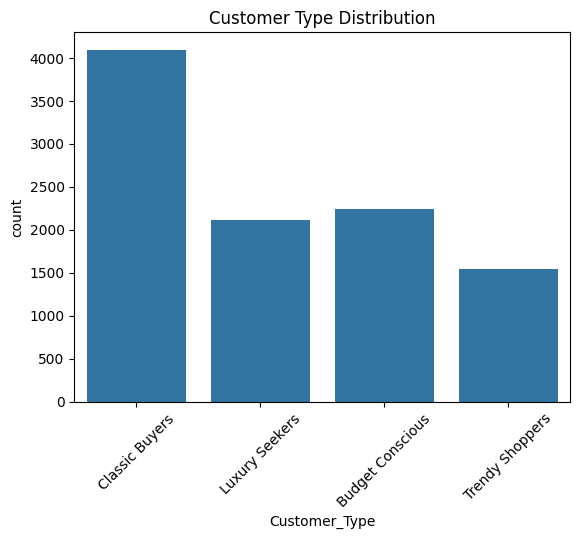

In [ ]:
import seaborn as sns

sns.countplot(x='Customer_Type', data=df_pandas)
plt.title('Customer Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group by cluster and analyze average sales behavior
sales_columns = ['qty', 'price', 'total_sales_before_discount', 'total_sales_after_discount'] + \
                [col for col in df_pandas.columns if 'sales_after_discount_d_' in col]

sales_summary = df_pandas.groupby('cluster')[sales_columns].mean()

# Calculate discount sensitivity: discount ratio = (before - after) / before
sales_summary['discount_ratio'] = (
    sales_summary['total_sales_before_discount'] - sales_summary['total_sales_after_discount']
) / sales_summary['total_sales_before_discount']

# Automatically label sales patterns
sales_behavior_labels = {}

for cluster_id, row in sales_summary.iterrows():
    qty = row['qty']
    price = row['price']
    discount_ratio = row['discount_ratio']

    label_parts = []

    # Quantity-based purchase behavior
    if qty > df_pandas['qty'].mean():
        label_parts.append("High Quantity Buyers")
    else:
        label_parts.append("Low Quantity Buyers")

    # Price sensitivity
    if discount_ratio > 0.25:
        label_parts.append("Highly Discount Sensitive")
    elif discount_ratio > 0.10:
        label_parts.append("Moderately Discount Sensitive")
    else:
        label_parts.append("Less Discount Sensitive")

    # Spending level
    if row['total_sales_after_discount'] > df_pandas['total_sales_after_discount'].mean():
        label_parts.append("High Spenders")
    else:
        label_parts.append("Moderate/Low Spenders")

    sales_behavior_labels[cluster_id] = f"Cluster {cluster_id}: " + ", ".join(label_parts)

# Print results
for cid, label in sales_behavior_labels.items():
    print(label)


Cluster 0: High Quantity Buyers, Less Discount Sensitive, High Spenders
Cluster 1: Low Quantity Buyers, Less Discount Sensitive, Moderate/Low Spenders
Cluster 2: Low Quantity Buyers, Less Discount Sensitive, Moderate/Low Spenders
Cluster 3: High Quantity Buyers, Less Discount Sensitive, Moderate/Low Spenders


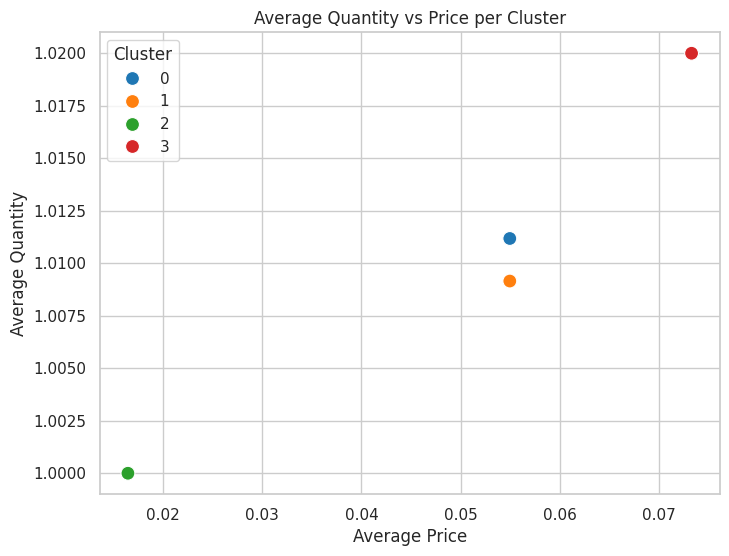

<Figure size 800x600 with 0 Axes>

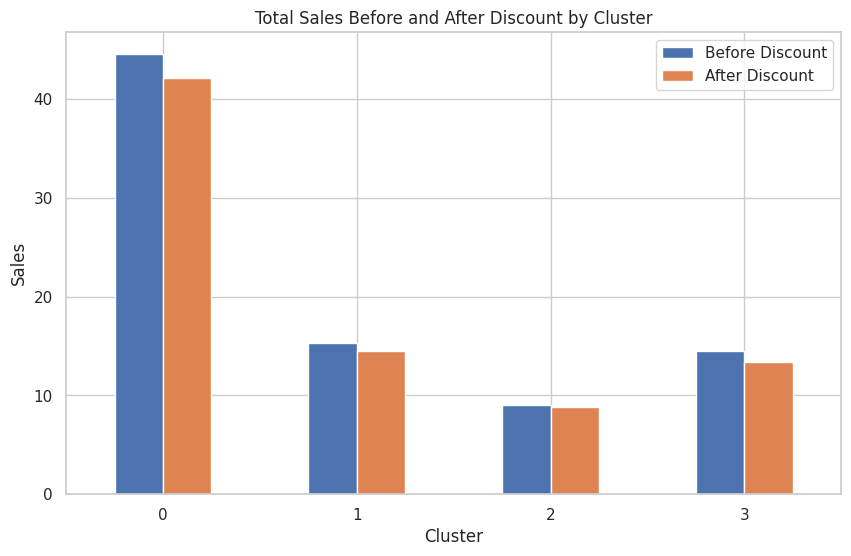

<ipython-input-19-ce74f16c851b>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_summary.index, y='discount_ratio', data=sales_summary, palette='coolwarm')


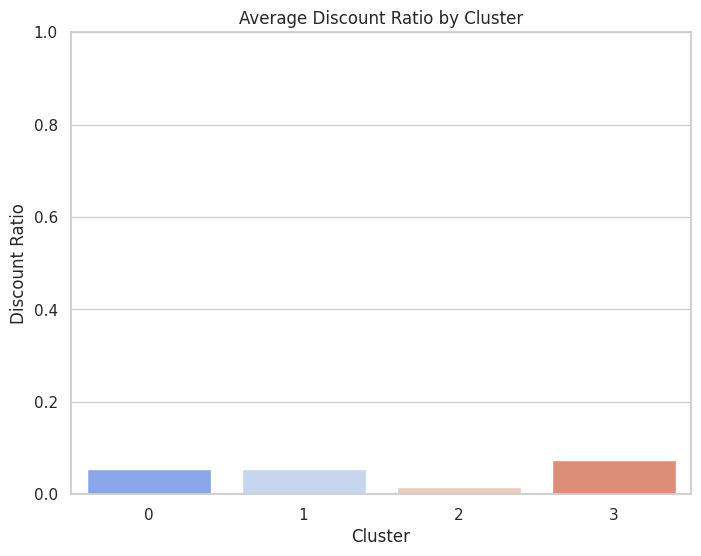

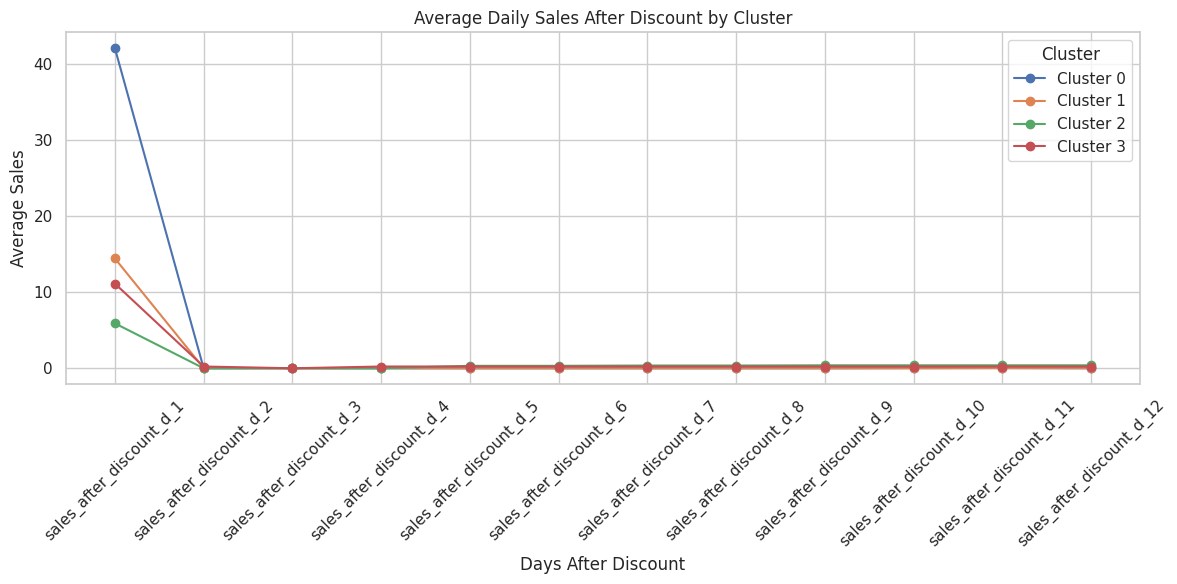

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Group by cluster
sales_columns = ['qty', 'price', 'total_sales_before_discount', 'total_sales_after_discount'] + \
                [col for col in df_pandas.columns if 'sales_after_discount_d_' in col]
sales_summary = df_pandas.groupby('cluster')[sales_columns].mean()

# Compute discount ratio
sales_summary['discount_ratio'] = (
    sales_summary['total_sales_before_discount'] - sales_summary['total_sales_after_discount']
) / sales_summary['total_sales_before_discount']

# Plot 1: Quantity vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='qty', hue=sales_summary.index, palette='tab10', s=100, data=sales_summary)
plt.title("Average Quantity vs Price per Cluster")
plt.xlabel("Average Price")
plt.ylabel("Average Quantity")
plt.legend(title="Cluster")
plt.show()

# Plot 2: Total Sales Before vs After Discount
plt.figure(figsize=(8, 6))
sales_summary[['total_sales_before_discount', 'total_sales_after_discount']].plot(kind='bar', figsize=(10,6))
plt.title("Total Sales Before and After Discount by Cluster")
plt.ylabel("Sales")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(["Before Discount", "After Discount"])
plt.grid(True)
plt.show()

# Plot 3: Discount Ratio
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_summary.index, y='discount_ratio', data=sales_summary, palette='coolwarm')
plt.title("Average Discount Ratio by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Discount Ratio")
plt.ylim(0, 1)
plt.show()

# Plot 4: Daily Sales Trend After Discount (D1 to D12)
sales_days = [col for col in df_pandas.columns if 'sales_after_discount_d_' in col]
daily_sales = df_pandas.groupby('cluster')[sales_days].mean().T

plt.figure(figsize=(12, 6))
for cluster in daily_sales.columns:
    plt.plot(daily_sales.index, daily_sales[cluster], label=f'Cluster {cluster}', marker='o')

plt.title("Average Daily Sales After Discount by Cluster")
plt.xlabel("Days After Discount")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()
